CNN - Referência - https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

In [5]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [6]:
# Importando o dataset
from keras.datasets import cifar10

# Carregar o conjunto de dados
(imagem_treino, classe_treino), (imagem_teste, classe_teste) = cifar10.load_data()

# Mostra as caracteristicas do dataset
print(imagem_treino.shape)
print(np.unique(classe_treino))

print(imagem_teste.shape)
print(np.unique(classe_teste))

(50000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]
(10000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


[9]


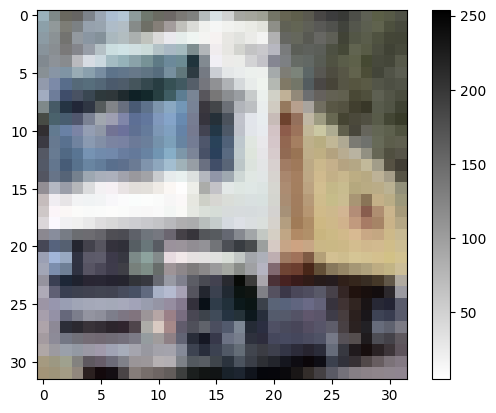

In [7]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

In [8]:
# Normalizando a escala para ficar entre 0 e 1
imagem_treino = imagem_treino/255
imagem_teste = imagem_teste/255

[9]


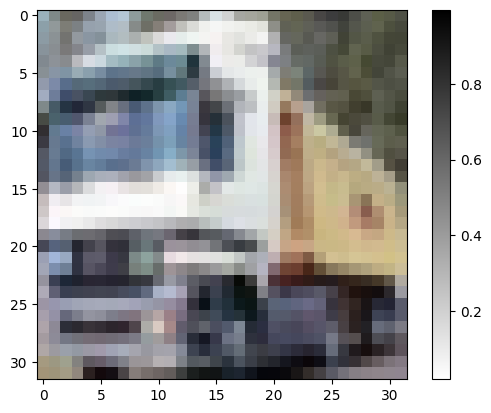

In [9]:
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

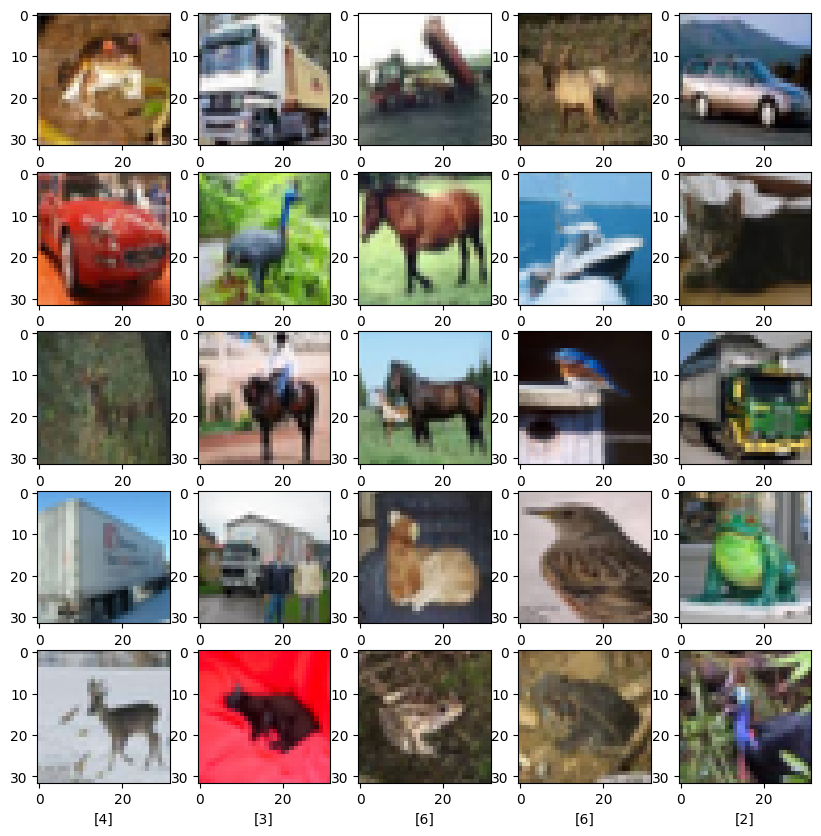

In [10]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(imagem_treino[i], cmap = 'binary')
  plt.xlabel(classe_treino[i])

In [11]:
# Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e 1 canal de cor - Escala de cinza
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))


# Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

# Adiciona uma camada de 128 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(128, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(10, activation='softmax'))





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,052,426 (4.01 MB)

 Trainable params: 1,052,426 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Treinando nosso modelo!
epochs_hist = model2.fit(imagem_treino, classe_treino, epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4013 - loss: 1.6679
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5975 - loss: 1.1394
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6541 - loss: 0.9902
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6867 - loss: 0.8789
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7159 - loss: 0.8131
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7433 - loss: 0.7330
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7711 - loss: 0.6500
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7918 - loss: 0.5943
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8162 - loss: 0.5320
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8332 - loss: 0.4757
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8530 - loss: 0.4155
Epoch 12/15
1563/1563 ━━━━━━━

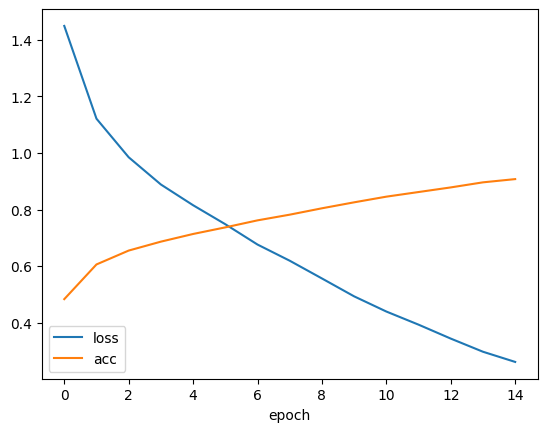

In [14]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

In [15]:
# Testando o Modelo
test_loss, test_acc = model2.evaluate(imagem_teste, classe_teste)

print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6276 - loss: 1.7710
1.8130830526351929
0.6245999932289124


In [16]:
# Funções para facilitar a visualização
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))

def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i].item()
   plt.grid(False)
   plt.xticks(range(10),range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

In [17]:
predictions = model2.predict(imagem_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
for i in range(80):
  if(np.argmax(predictions[i]) != classe_teste[i]):
    print(i)

4
7
12
16
17
20
22
24
25
31
35
36
40
49
57
58
65
76


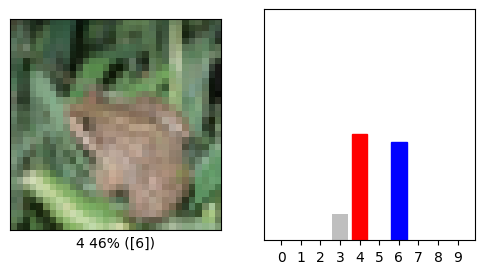

In [19]:
# Agora vamos avaliar as imagens que ele errou
i = 4 # Substitua por um indice
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, classe_teste, imagem_teste[:,:,:])
plt.subplot(1,2,2)
plot_value_array(i, predictions, classe_teste)

In [20]:
# Salvando o modelo treinado
model2.save("modelo_treinado.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


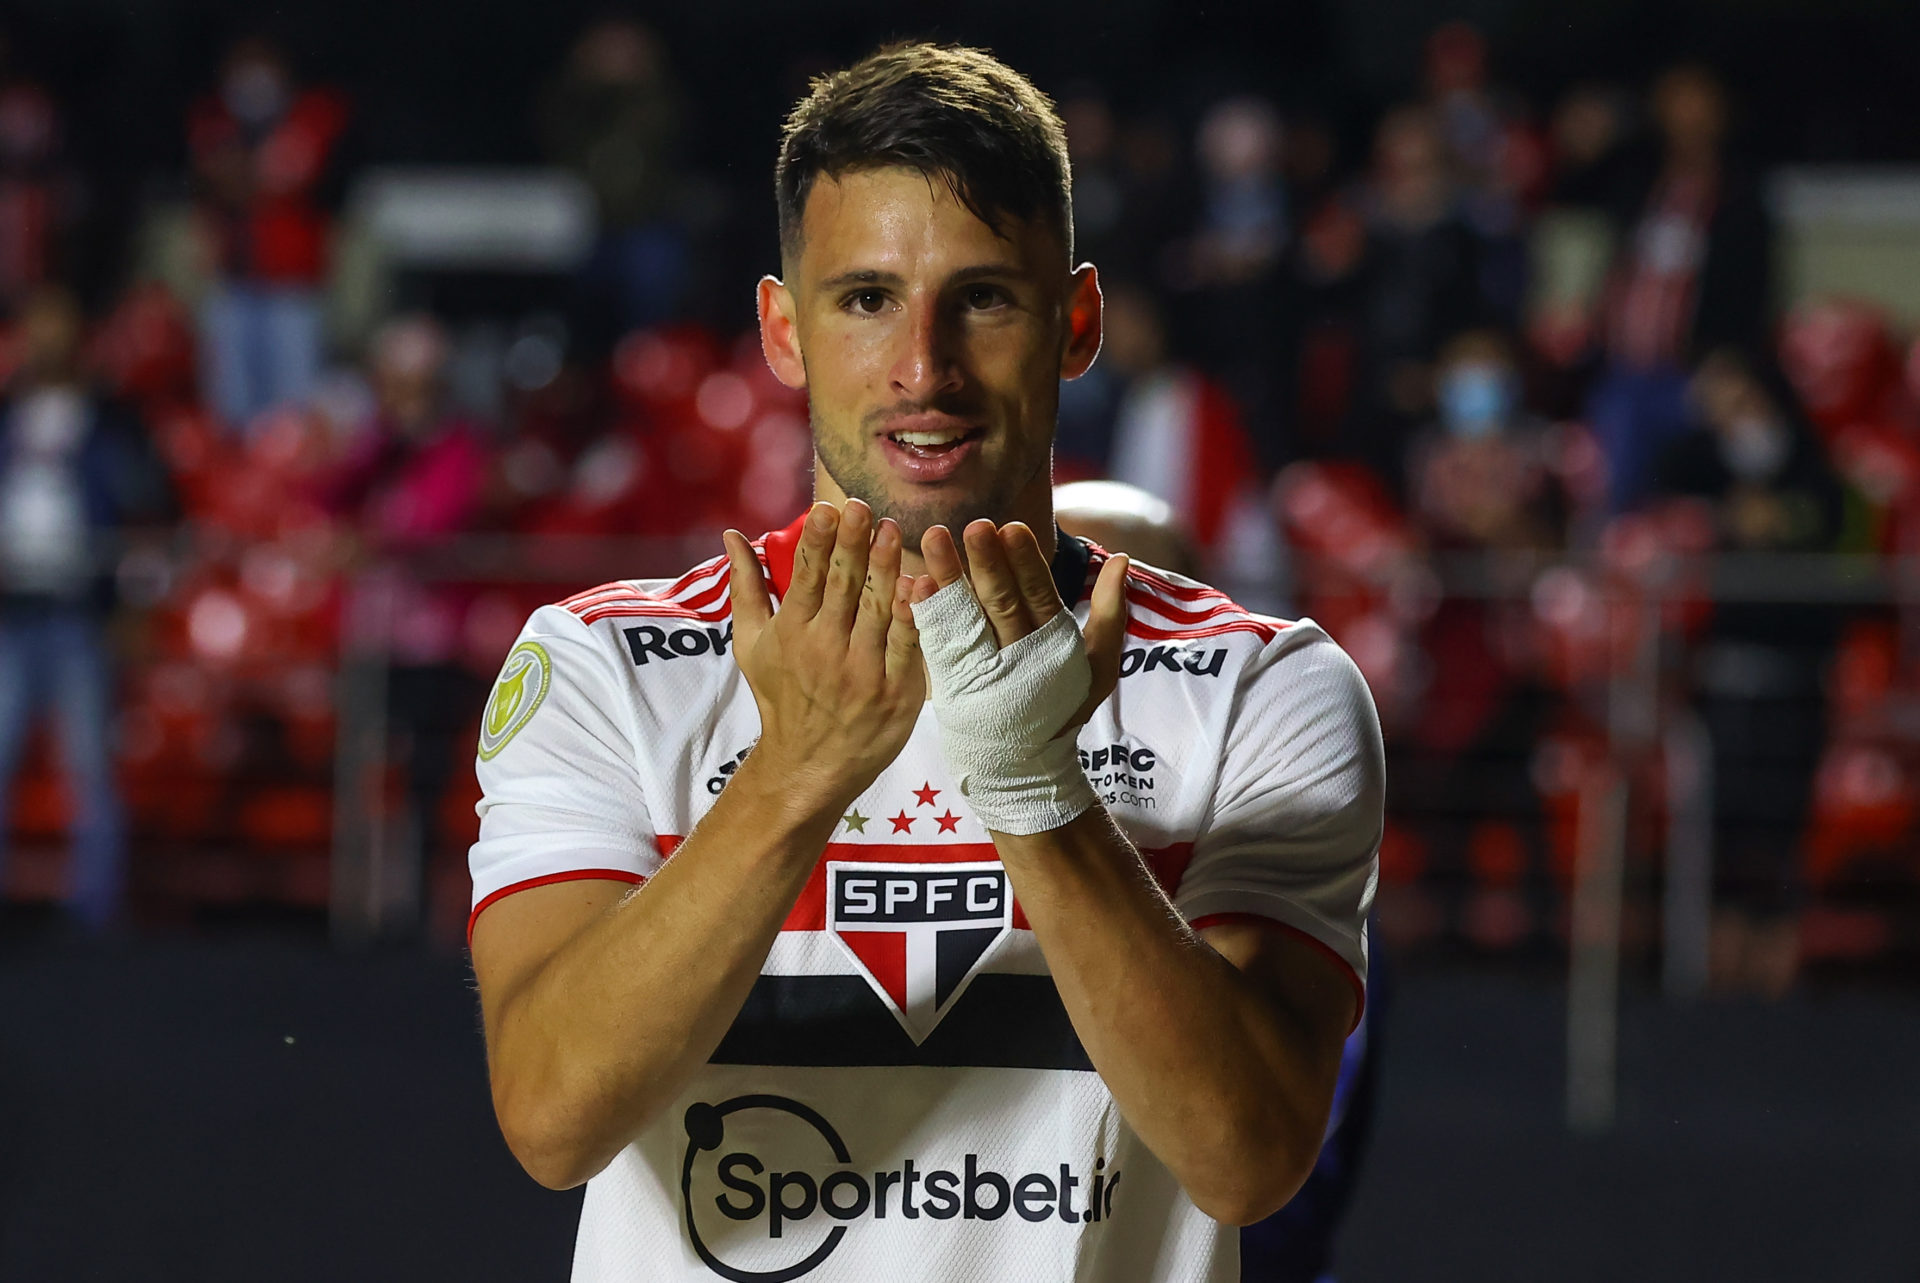

A classe predita para a imagem é: 6


In [24]:
# Salvando o modelo treinado
model2.save("modelo_treinado.h5")

# Carregando o modelo treinado
modelo_carregado = keras.models.load_model("modelo_treinado.h5")

# carregar uma imagem e redimensioná-la para o formato desejado (32x32,3)
from keras.preprocessing import image
from IPython.display import display, Image


caminho_da_imagem = 'Calleri4.jpg'
img = image.load_img(caminho_da_imagem, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array.reshape((1, 32, 32, 3))

# Normalizando a escala para ficar entre 0 e 1
img_array = img_array / 255.0

# Avaliando a imagem usando o modelo carregado
predicao = modelo_carregado.predict(img_array)

# Obtendo a classe predita
classe_predita = np.argmax(predicao)

# Exibindo a imagem
display(Image(filename=caminho_da_imagem))

# Exibindo o resultado
print(f"A classe predita para a imagem é: {classe_predita}")

# Extensão H5 (jpg)
# GS - testar imagem da internet